In [3]:
## Importing Libraries

In [141]:
import pandas as pd
import numpy as np

#visualisation
import seaborn as sns                       
import matplotlib.pyplot as plt             
%matplotlib inline     
sns.set(color_codes=True)

## Warnings

import warnings
warnings.filterwarnings('ignore')

In [143]:
## Load the Cycle Dataset 

df_cycle = pd.read_csv("/Users/swethag/Desktop/Upgrad_Data_Science/GitHub/Capstone-Project/CycleData.csv", header = 0)
df_cycle.head()

,ASSOCPAYLOADNOMINAL,AT Available Time (iMine),Autonomous,Available SMU Time,Available Time,Completed Cycle Count,COMPLETEDCYCLEDURATION,Creation Mode,CT Calendar SMU Time,CT Calendar Time,...,Primary Machine Name,Primary Machine Category Name,Primary Machine Class Name,Secondary Machine Name,Secondary Machine Category Name,Secondary Machine Class Name,Crew OID,Job Code Description,Job Code Name,Job Type
0,NaN,737,1.0,737,737,1,737,0,737,737,...,DT5209,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,10718152792,unknown,unknown,NaN
1,NaN,527,1.0,527,527,1,527,0,527,527,...,DT5209,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,10718152792,unknown,unknown,NaN
2,NaN,496,1.0,292,496,1,496,0,264,496,...,DT5283,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,10718152792,unknown,unknown,NaN
3,NaN,714,1.0,420,714,1,714,0,403,714,...,DT5283,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,10718152792,unknown,unknown,NaN
4,NaN,512,1.0,300,512,1,512,0,300,512,...,DT5283,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,10718152792,unknown,unknown,NaN


In [144]:
df_cycle.shape

(47344, 93)

In [145]:
df_cycle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47344 entries, 0 to 47343
Data columns (total 93 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   ASSOCPAYLOADNOMINAL                         21992 non-null  float64
 1   AT Available Time (iMine)                   47344 non-null  int64  
 2   Autonomous                                  44582 non-null  float64
 3   Available SMU Time                          47344 non-null  int64  
 4   Available Time                              47344 non-null  int64  
 5   Completed Cycle Count                       47344 non-null  int64  
 6   COMPLETEDCYCLEDURATION                      47344 non-null  int64  
 7   Creation Mode                               47344 non-null  int64  
 8   CT Calendar SMU Time                        47344 non-null  int64  
 9   CT Calendar Time                            47344 non-null  int64  
 10  Cycle Dura

In [146]:
null_percentage = df_cycle.isnull().mean() * 100

In [147]:
null_percentage[null_percentage > 55]


Source Queuing Start Timestamp (GMT8)    66.124535
Source Location Description              87.761913
Job Type                                 98.312352
dtype: float64

The above column with greater than 55% of null values is droppped and these columns are of no use for the data set analysis 

In [148]:
df_cycle.drop(['Source Queuing Start Timestamp (GMT8)'], axis = 1, inplace = True)
df_cycle.drop(['Source Location Description'], axis = 1, inplace = True)
df_cycle.drop(['Job Type'], axis = 1, inplace = True)

In [149]:
df_cycle.shape

(47344, 90)

In [150]:
# Get numerical columns
numeric_cols = df_cycle.select_dtypes(include=['int64', 'float64']).columns  
print("Numerical Columns:", numeric_cols)

Numerical Columns: Index(['ASSOCPAYLOADNOMINAL', 'AT Available Time (iMine)', 'Autonomous',
       'Available SMU Time', 'Available Time', 'Completed Cycle Count',
       'COMPLETEDCYCLEDURATION', 'Creation Mode', 'CT Calendar SMU Time',
       'CT Calendar Time', 'Cycle Duration', 'Cycle SMU Duration',
       'Delay Time', 'Down Time', 'DTE Down Time Equipment',
       'Dumping Duration', 'Dumping SMU Duration',
       'Destination Dumping Start Timestamp (GMT8)', 'Empty EFH Distance',
       'Empty EFH Length', 'Empty Expected Travel Duration',
       'Empty Fall Height', 'Empty Plan Length', 'Empty Slope Distance',
       'Empty Slope Length', 'Empty Target Travel Duration',
       'Empty Travel Duration', 'Estimated Fuel Used', 'Fuel Used',
       'Full Expected Travel Duration', 'Full Travel Duration', 'IC',
       'Idle Duration', 'iMine Availability', 'iMine Engine Hours',
       'iMine Operating Hours', 'iMine Utilisation', 'Loading Count',
       'Loading Duration', 'Loading E

<Figure size 1200x600 with 0 Axes>

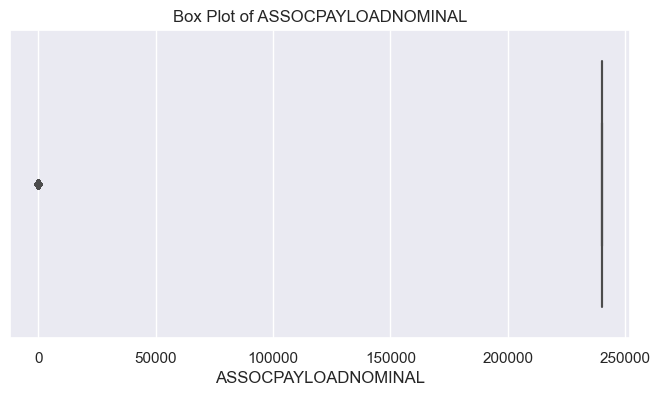

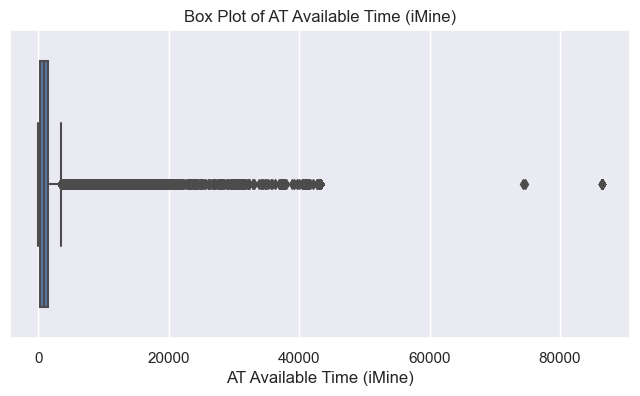

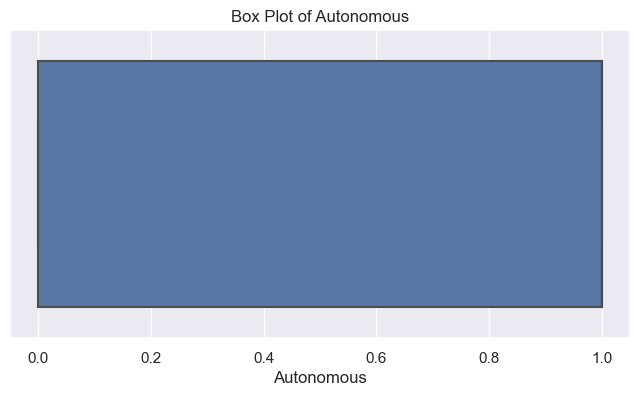

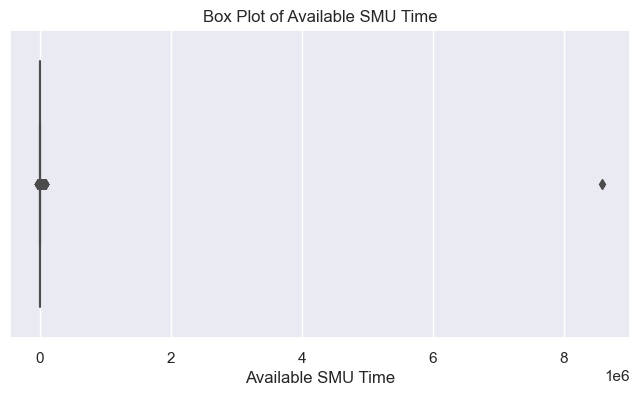

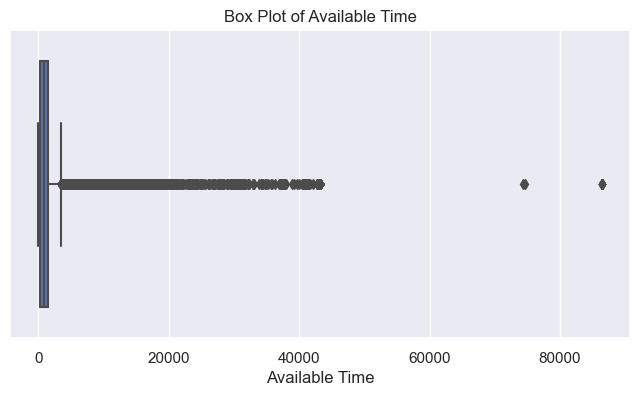

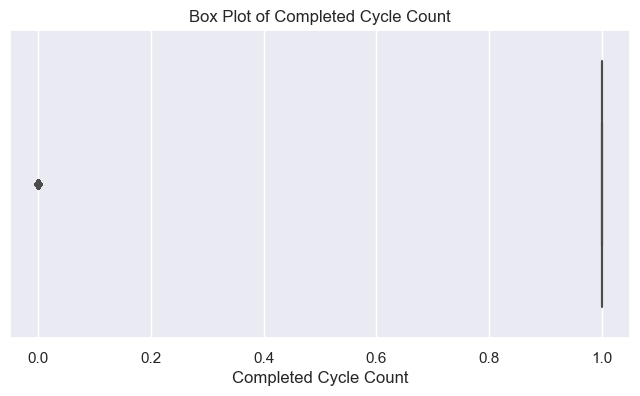

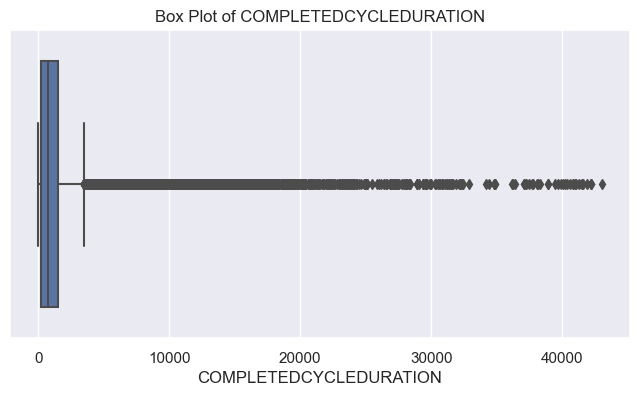

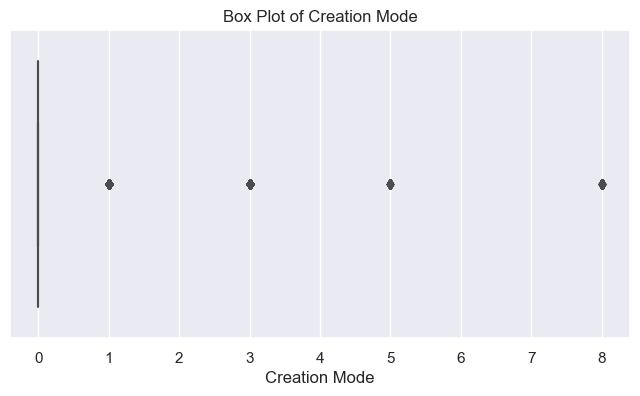

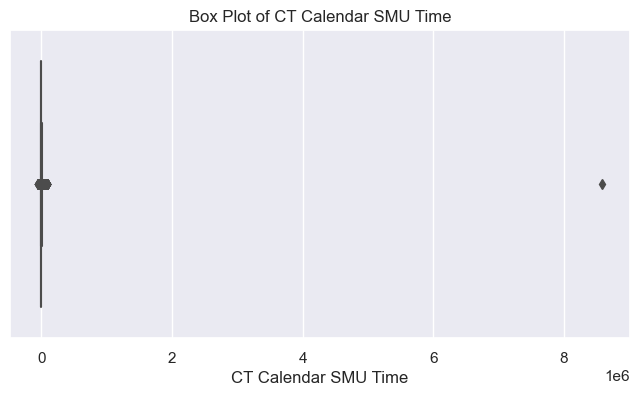

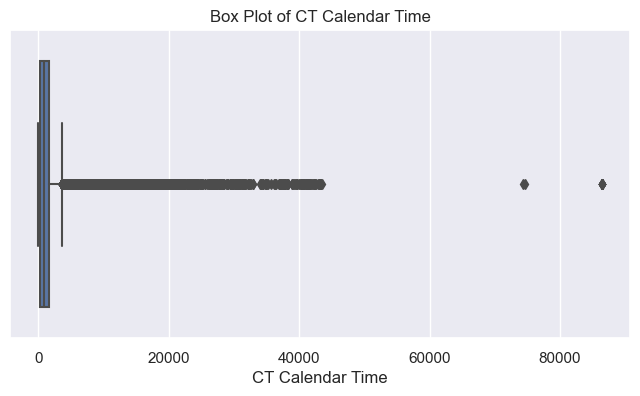

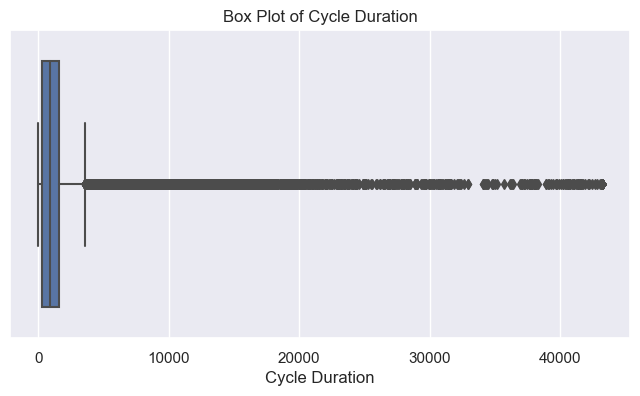

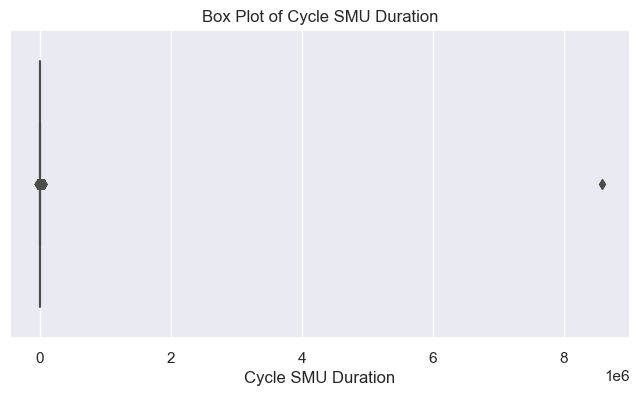

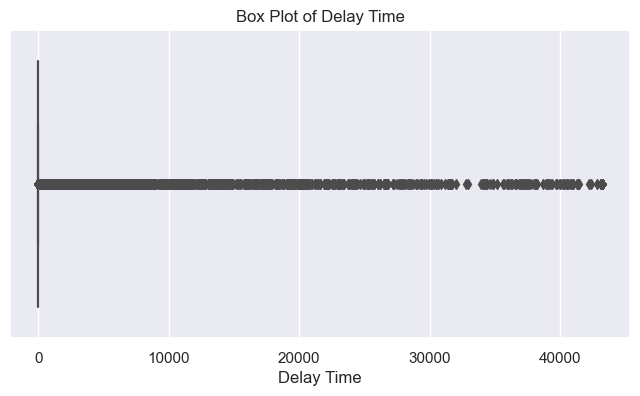

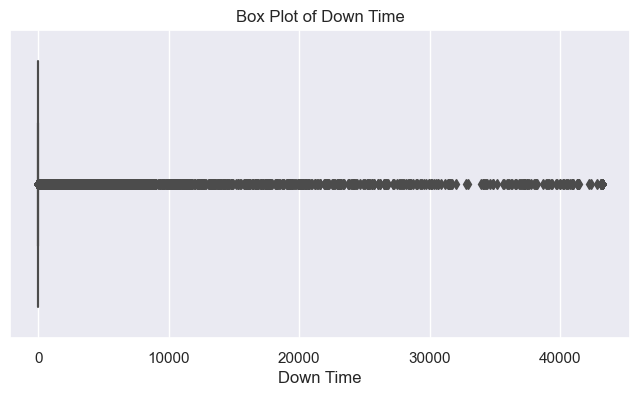

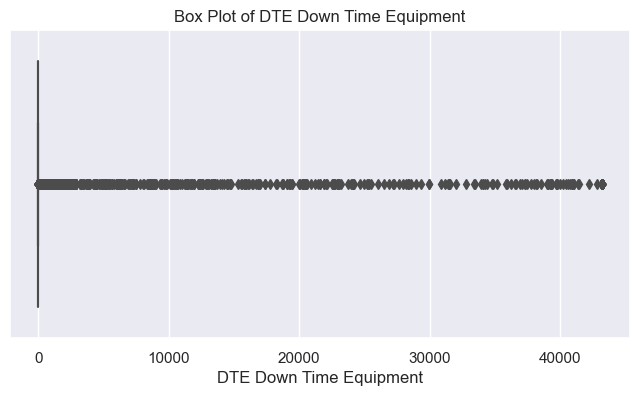

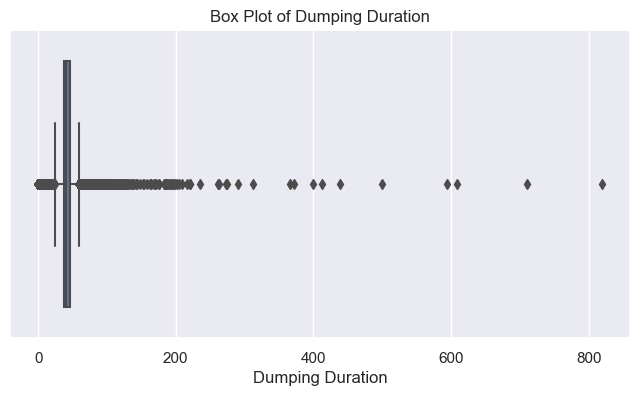

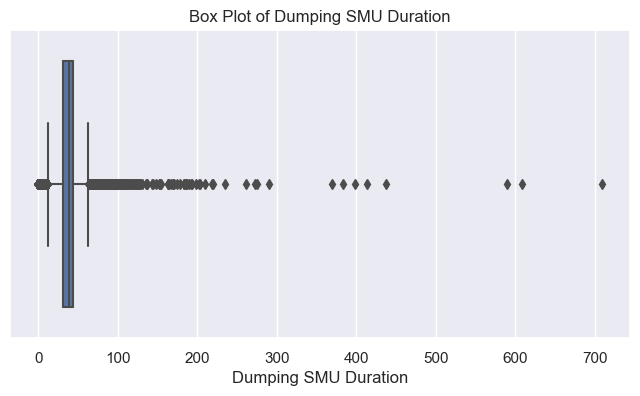

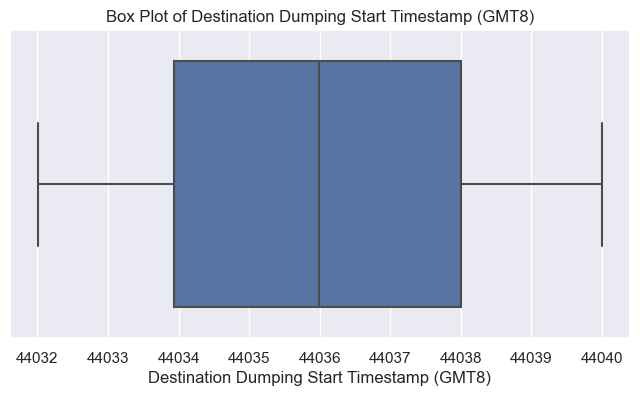

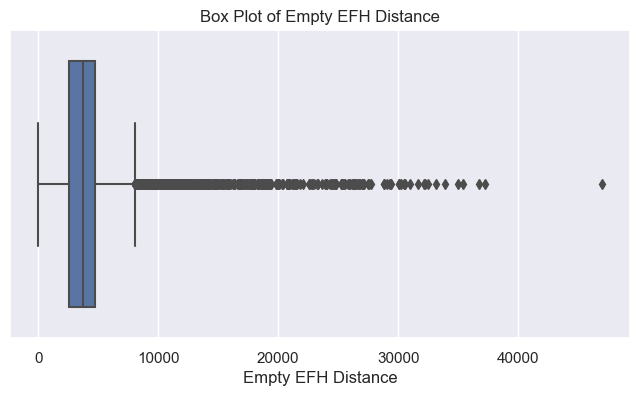

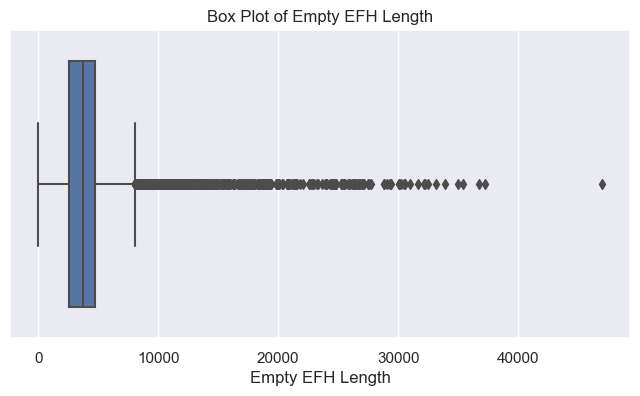

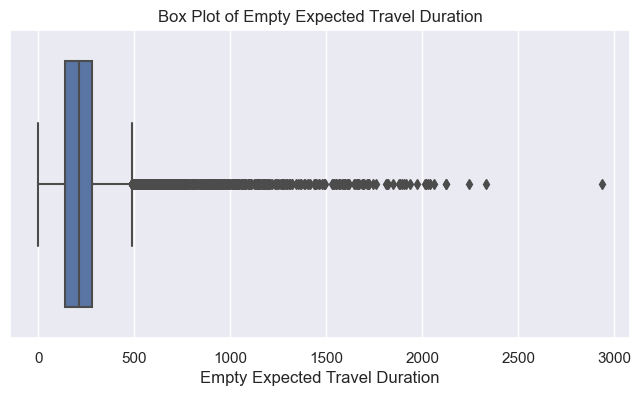

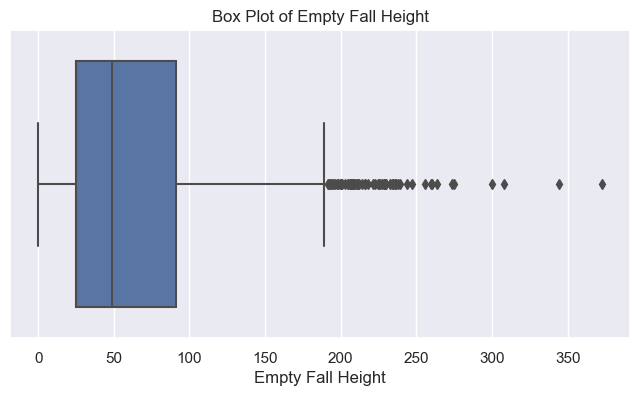

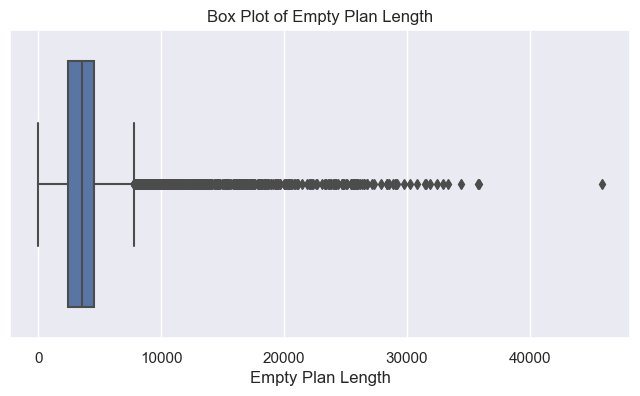

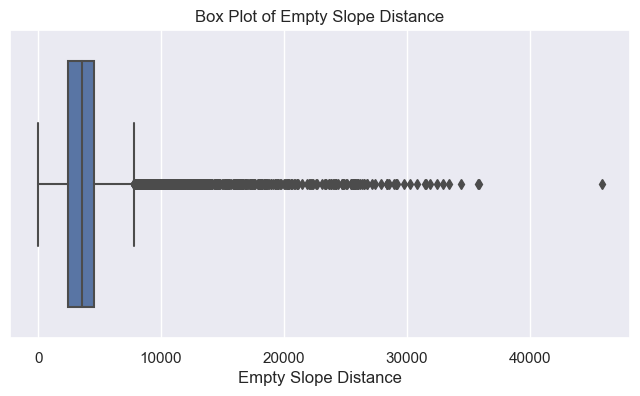

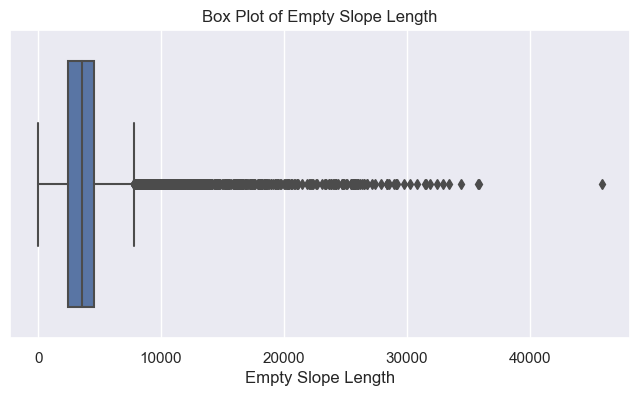

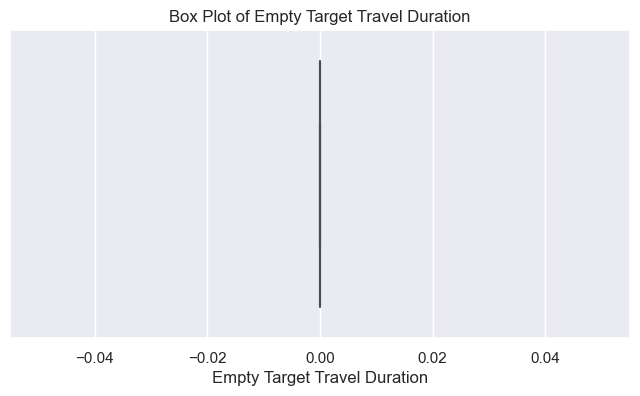

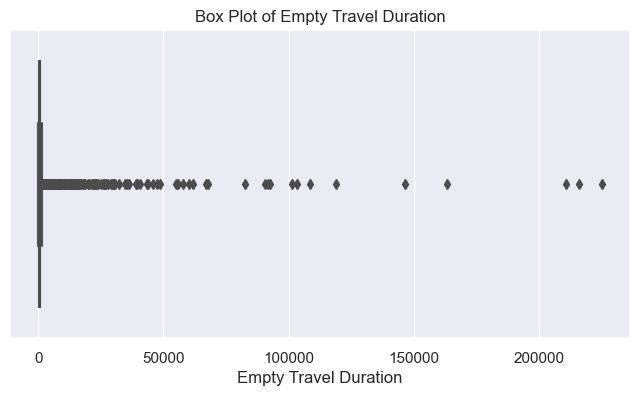

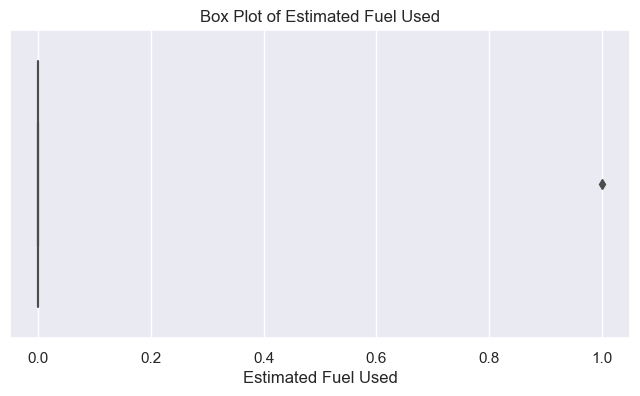

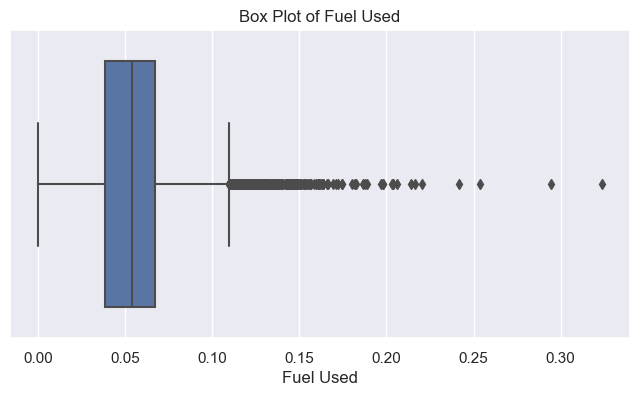

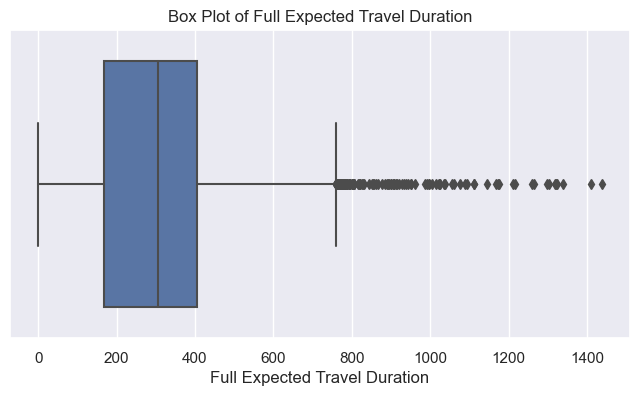

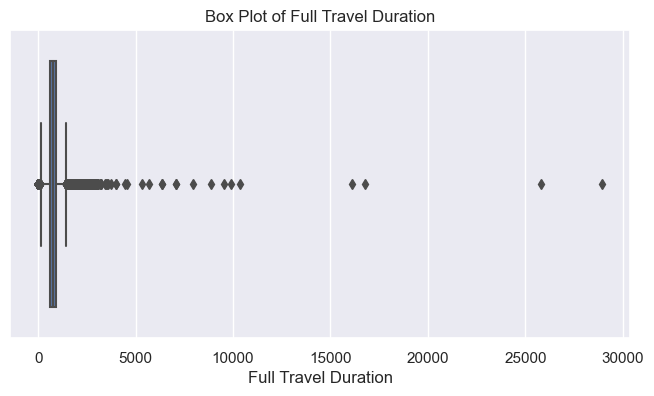

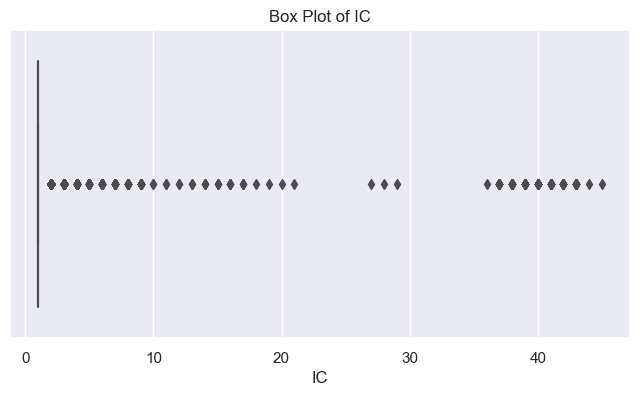

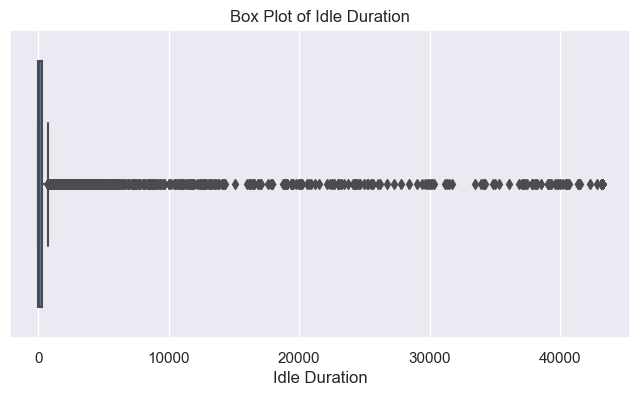

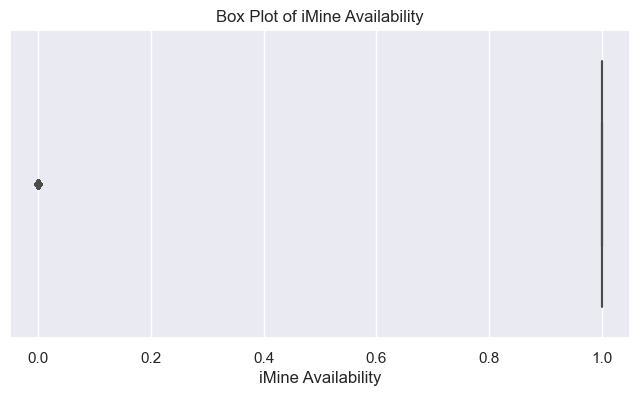

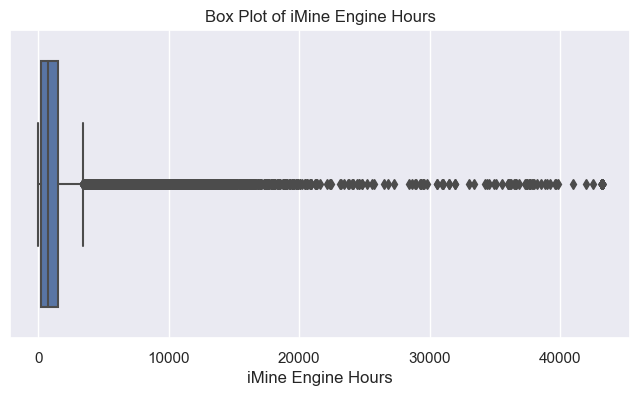

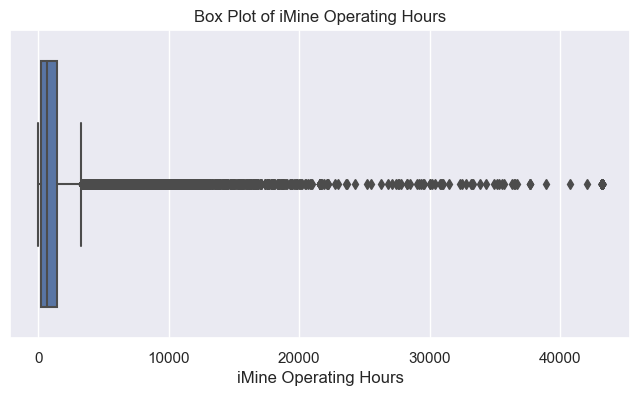

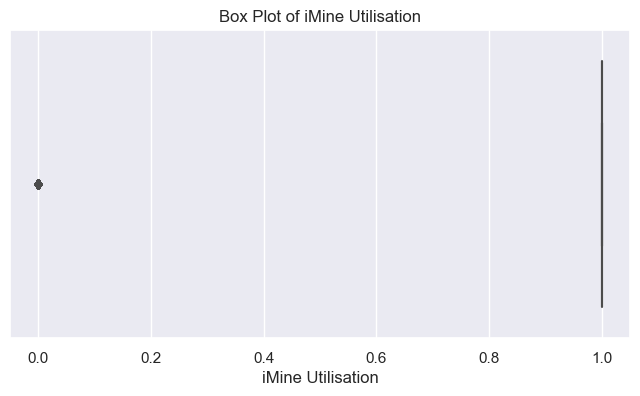

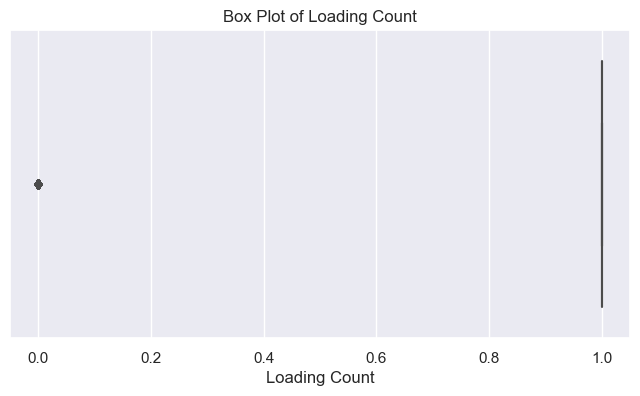

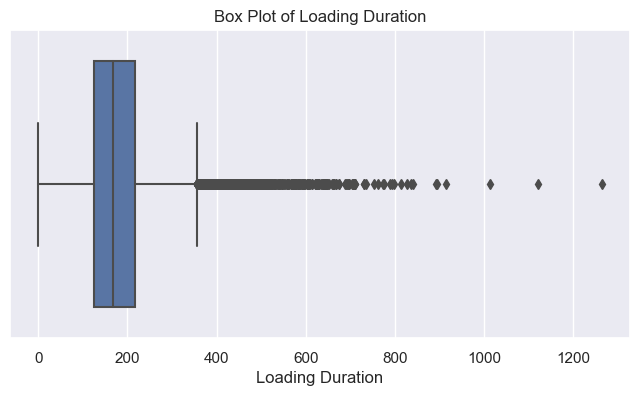

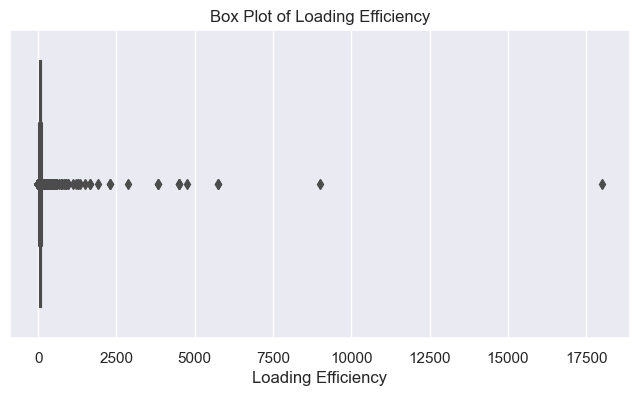

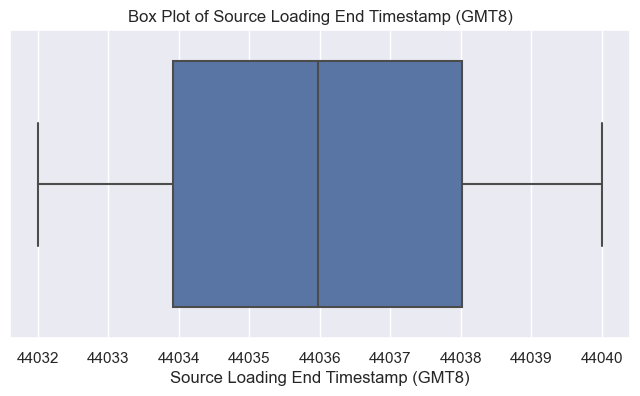

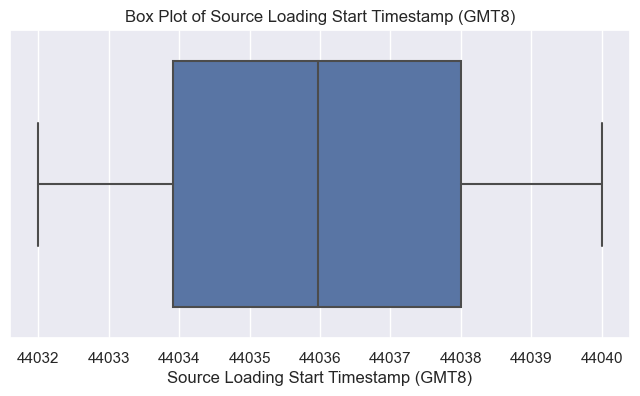

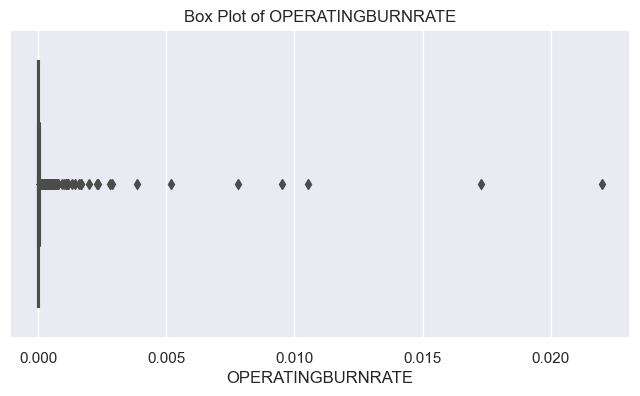

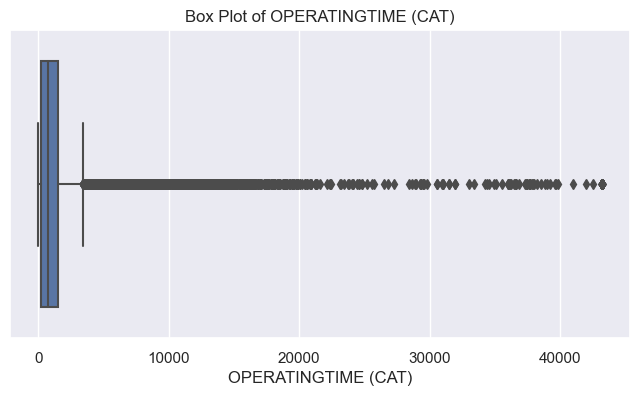

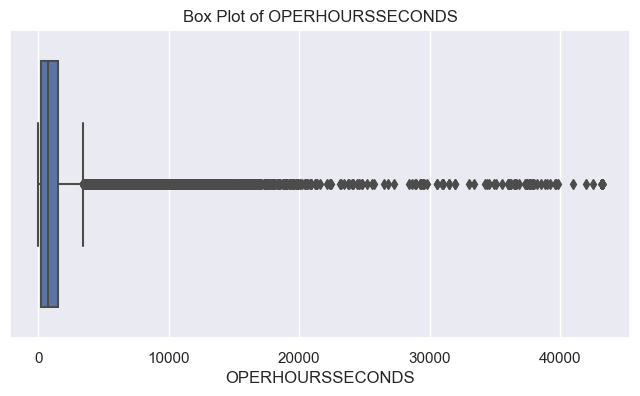

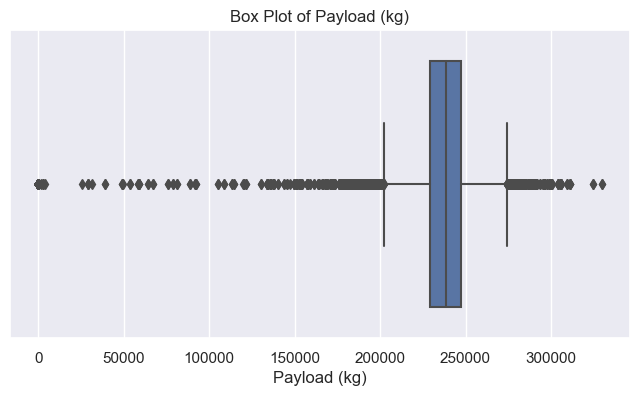

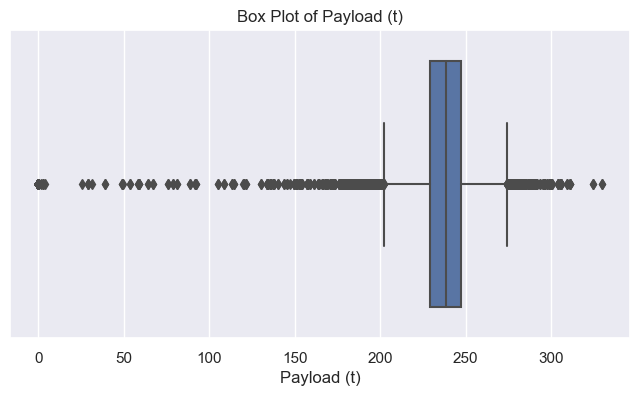

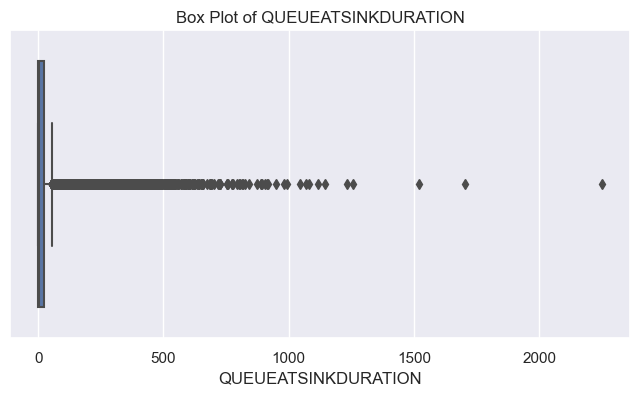

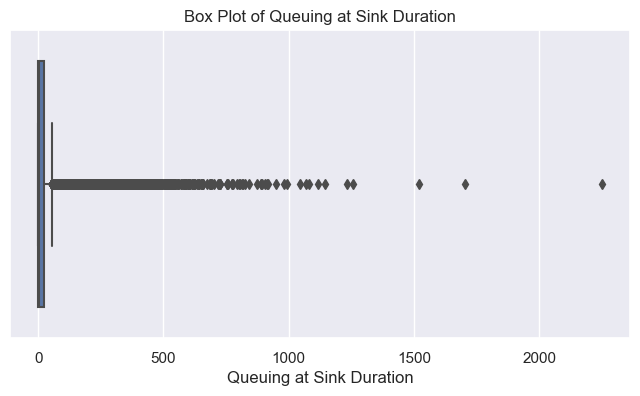

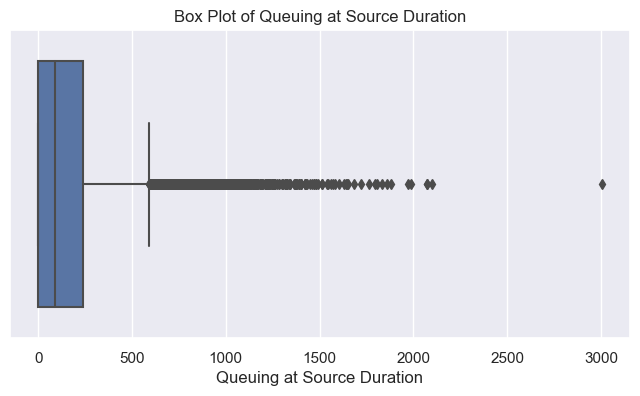

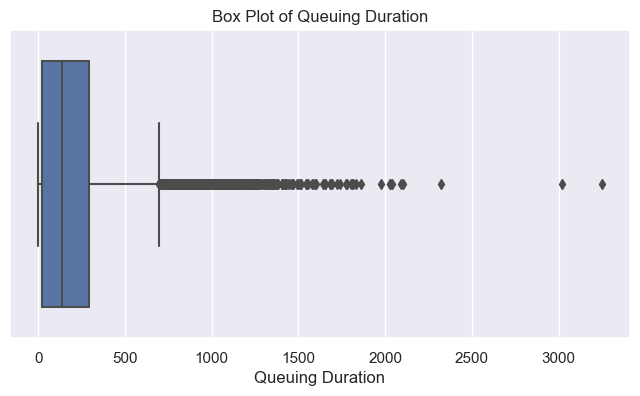

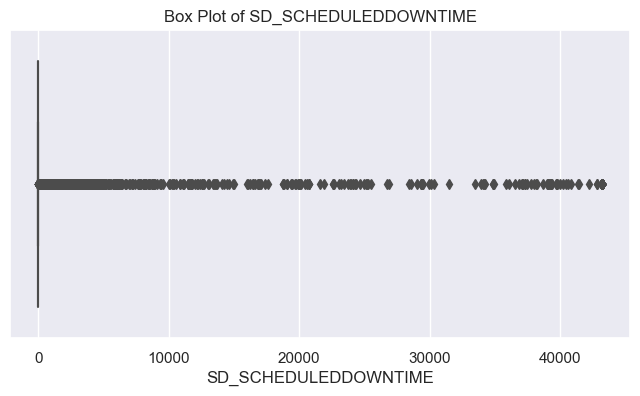

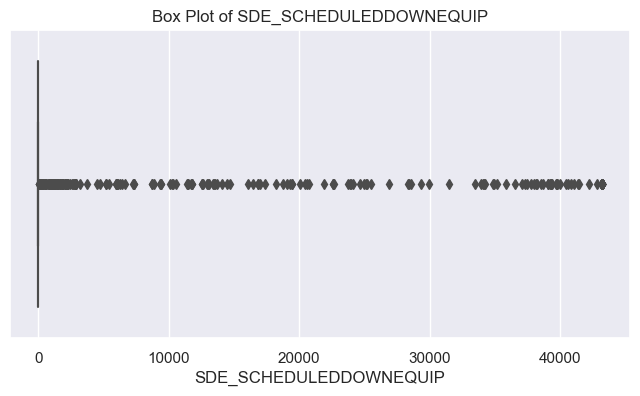

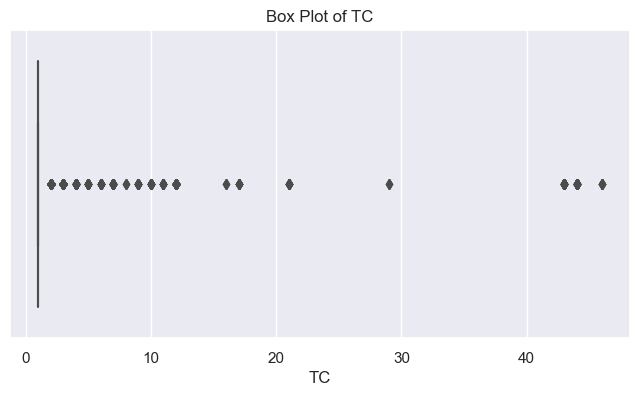

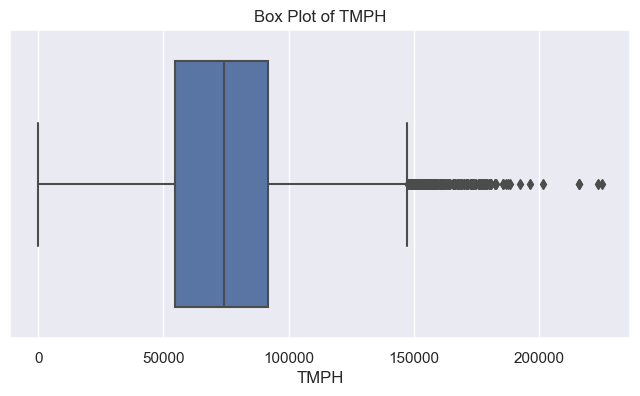

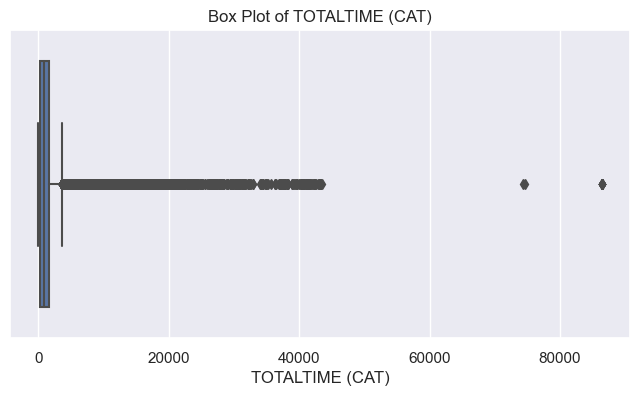

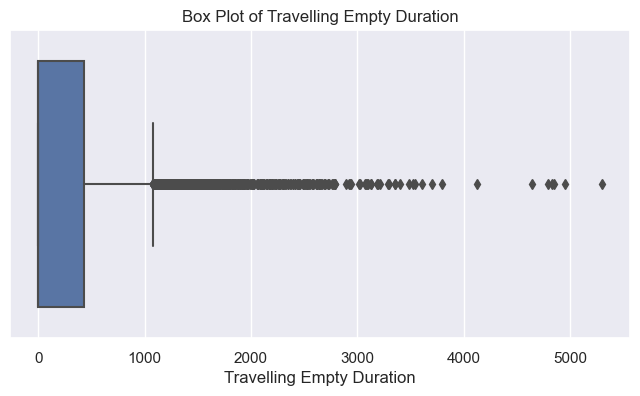

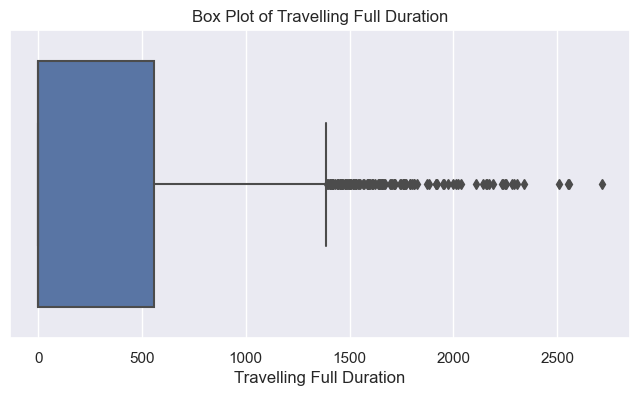

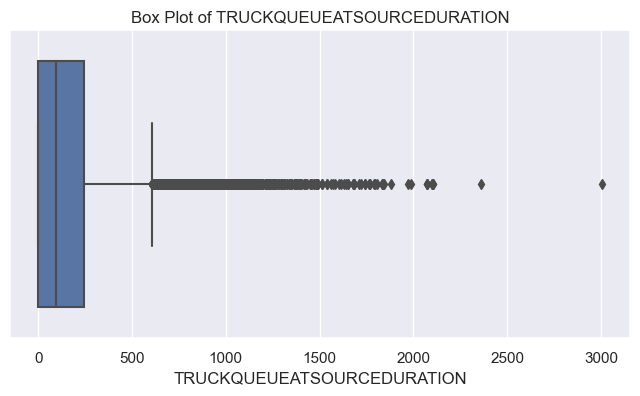

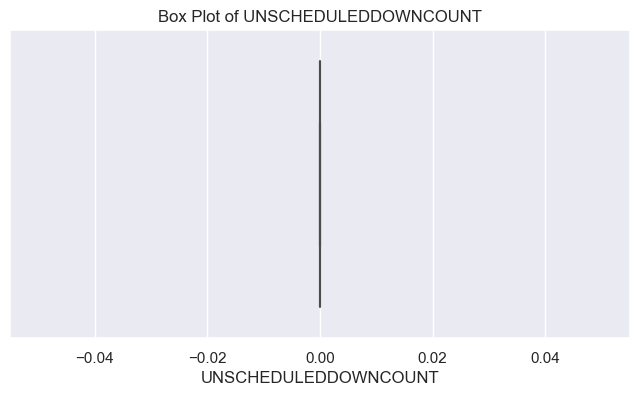

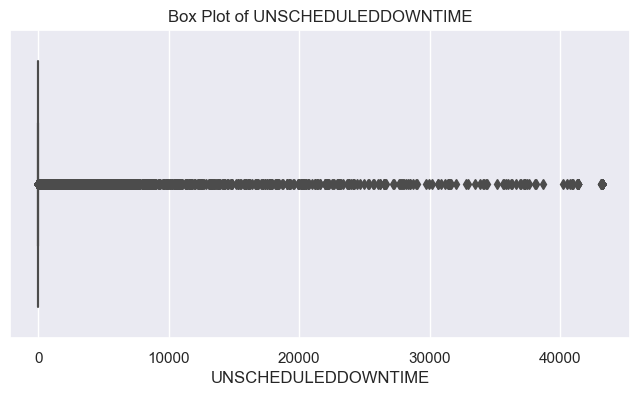

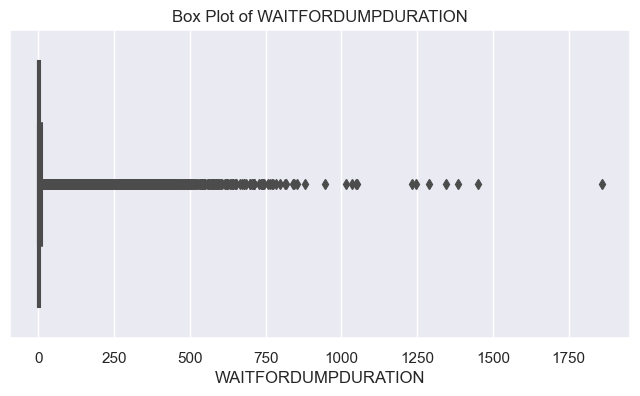

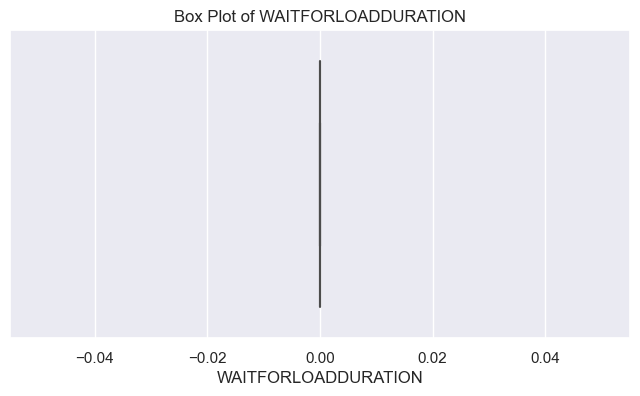

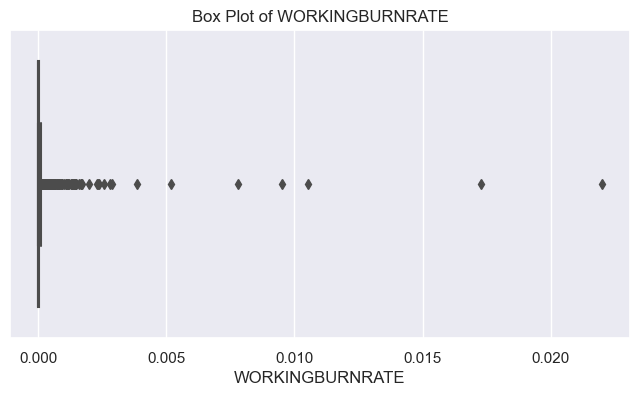

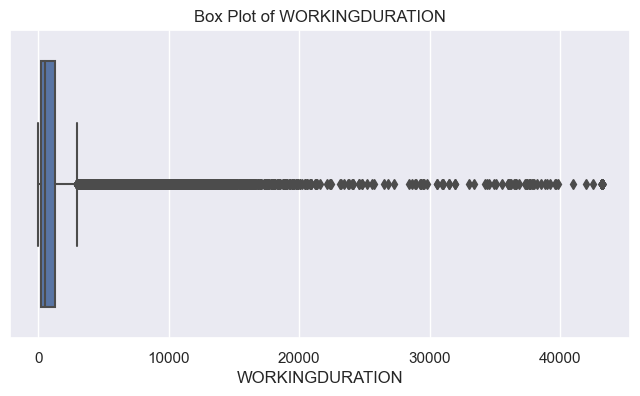

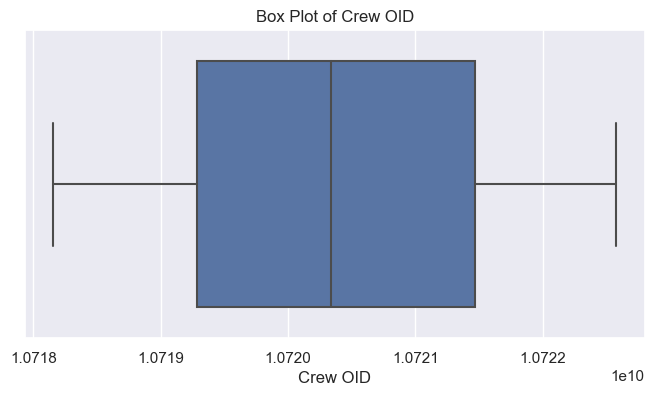

In [151]:
# Set the figure size  
plt.figure(figsize=(12, 6))  

# Loop through numerical columns and create boxplots  
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_cycle[col])
    plt.title(f"Box Plot of {col}")
    plt.show()


##### Below Column's are not required in Cycle Data Set (As the data that holds is a monotomous value)
	1. Autonomous 
    2. UNSCHEDULEDDOWNCOUNT
    3. Creation Mode

In [152]:
df_cycle.drop(['Autonomous','UNSCHEDULEDDOWNCOUNT', 'Creation Mode'], axis = 1, inplace = True)

In [153]:
df_cycle.head(3)

,ASSOCPAYLOADNOMINAL,AT Available Time (iMine),Available SMU Time,Available Time,Completed Cycle Count,COMPLETEDCYCLEDURATION,CT Calendar SMU Time,CT Calendar Time,Cycle Duration,Cycle SMU Duration,...,Destination Location is Source Flag,Primary Machine Name,Primary Machine Category Name,Primary Machine Class Name,Secondary Machine Name,Secondary Machine Category Name,Secondary Machine Class Name,Crew OID,Job Code Description,Job Code Name
0,NaN,737,737,737,1,737,737,737,737,737,...,N,DT5209,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,10718152792,unknown,unknown
1,NaN,527,527,527,1,527,527,527,527,527,...,N,DT5209,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,10718152792,unknown,unknown
2,NaN,496,292,496,1,496,264,496,496,292,...,N,DT5283,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,10718152792,unknown,unknown


In [154]:
df_cycle.shape

(47344, 87)

In [ ]:
# Filling Null values for these columns - Dumping Duration, Loading Efficiency, Dumping SMU Duration, Empty Travel Duration

In [208]:
df_cycle['Dumping Duration'] = df_cycle['Dumping Duration'].fillna(df_cycle['Dumping Duration'].mean())

In [209]:
df_cycle['Dumping Duration'].isna().sum()

0

In [212]:
df_cycle['Loading Efficiency'] = df_cycle['Loading Efficiency'].fillna(df_cycle['Loading Efficiency'].median())

In [213]:
df_cycle['Loading Efficiency'].isna().sum()

0

In [218]:
df_cycle['Dumping SMU Duration'] = df_cycle['Dumping SMU Duration'].fillna(df_cycle['Dumping SMU Duration'].mean())

In [220]:
df_cycle['Dumping SMU Duration'].isna().sum()

0

In [221]:
df_cycle['Empty Travel Duration'].isna().sum()

24754

In [ ]:
df_cycle['Dumping SMU Duration'] = df_cycle['Dumping SMU Duration'].fillna(df_cycle['Dumping SMU Duration'].mean())

In [223]:
df_cycle['Empty Travel Duration'].median()


610.0

In [225]:
df_cycle['Empty Travel Duration'] = df_cycle['Empty Travel Duration'].fillna(df_cycle['Empty Travel Duration'].mean())

In [227]:
df_cycle['Empty Travel Duration'].isna().sum()

0

In [71]:
### Loading Delay dataset

df_delay = pd.read_csv("/Users/swethag/Desktop/Upgrad_Data_Science/GitHub/Capstone-Project/DelayData.csv", header = 0)

df_delay.head()

,Delay OID,Description,ECF Class ID,Acknowledge Flag,Acknowledged Flag,Confirmed Flag,Engine Stopped Flag,Field Notification Required Flag,Office Confirm Flag,Production Reporting Only Flag,...,Target Machine is Active Flag,Target Machine Class Name,Target Machine Class Description,Target Machine Class is Active Flag,Target Machine Class Category Name,Delay Reported By Person Name,Delay Reported By User Name,Delay Status Description,Delay Start Timestamp (GMT8),Delay Finish Timestamp (GMT8)
0,10721642969,MACHINE GEN Started a delay: 2110_Operator_Hot...,XAEntity.Delay,N,N,N,N,N,N,Y,...,Y,994H,Wheel Loader,Y,Loader Classes,Daniel Nye,NaN,Historical,2020-07-26 02:04:59,2020-07-26 02:08:41
1,10721643044,6026,XAEntity.Delay,N,N,N,N,Y,N,Y,...,Y,CAT 793F CMD,Caterpillar 793 F Autonomous Mining Truck,Y,Truck Classes,NaN,NaN,Historical,2020-07-26 01:59:06,2020-07-26 02:05:54
2,10721643462,- [STOP_MACHINE : [PRIMARY_POWERTRAIN]],XAEntity.Delay,N,N,N,N,N,N,Y,...,Y,CAT 793F CMD,Caterpillar 793 F Autonomous Mining Truck,Y,Truck Classes,NaN,NaN,Historical,2020-07-26 02:06:13,2020-07-26 02:06:24
3,10721643635,- [STOP_MACHINE : [PRIMARY_POWERTRAIN]] acces...,XAEntity.Delay,N,N,N,N,Y,N,Y,...,Y,CAT 793F CMD,Caterpillar 793 F Autonomous Mining Truck,Y,Truck Classes,NaN,NaN,Historical,2020-07-26 02:06:25,2020-07-26 02:23:48
4,10721645207,5271,XAEntity.Delay,N,N,N,N,Y,N,N,...,Y,CAT 793F CMD,Caterpillar 793 F Autonomous Mining Truck,Y,Truck Classes,NaN,Casey Ruck,Historical,2020-07-26 02:09:44,2020-07-26 02:15:00


In [73]:
df_delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8782 entries, 0 to 8781
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Delay OID                            8782 non-null   int64  
 1   Description                          6701 non-null   object 
 2   ECF Class ID                         8782 non-null   object 
 3   Acknowledge Flag                     8782 non-null   object 
 4   Acknowledged Flag                    8782 non-null   object 
 5   Confirmed Flag                       8782 non-null   object 
 6   Engine Stopped Flag                  8782 non-null   object 
 7   Field Notification Required Flag     8782 non-null   object 
 8   Office Confirm Flag                  8782 non-null   object 
 9   Production Reporting Only Flag       8782 non-null   object 
 10  Frequency Type                       8782 non-null   int64  
 11  Shift Type                    

In [93]:
df_delay.shape

(8782, 30)

In [94]:
num_cols = df_delay.select_dtypes(include = ['int64','float64']).columns
num_cols

Index(['Delay OID', 'Frequency Type', 'Shift Type', 'Target Location',
       'Target Road'],
      dtype='object')

<Figure size 1200x600 with 0 Axes>

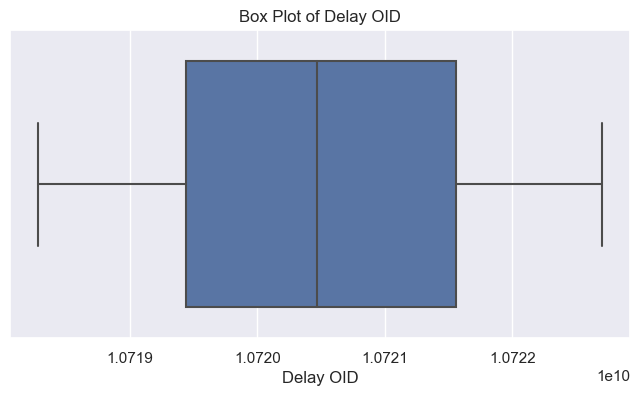

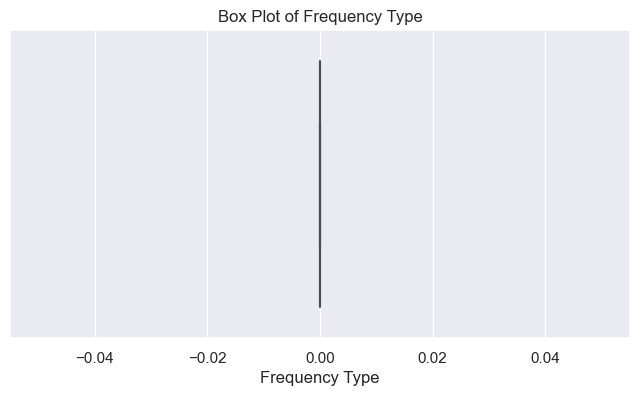

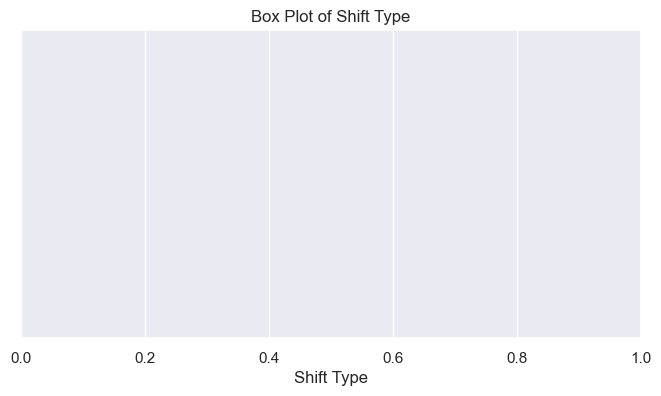

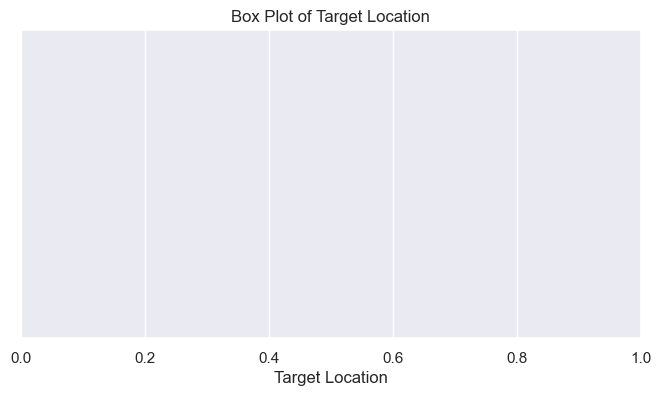

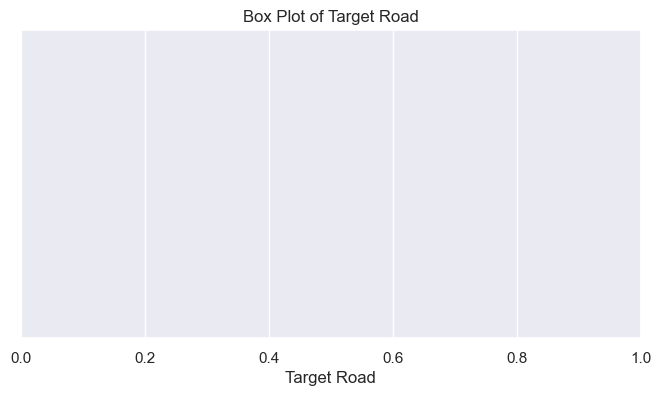

In [95]:
# Set the figure size  
plt.figure(figsize=(12, 6))  

# Loop through numerical columns and create boxplots  
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x = df_delay[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

In [111]:
missingvalue_delay = df_delay.isnull().mean() * 100
missingvalue_delay[missingvalue_delay > 55]

Shift Type                       100.000000
Target Location                  100.000000
Target Road                      100.000000
Workorder Ref                     97.062173
Delay Reported By Person Name     67.273969
Delay Reported By User Name       84.206331
dtype: float64

##### The below columns are droped from  Delay data set as the dataset consists of too much missing value and other reasons are due to single value present in entire column - 
##### Column which are not required not required in Delay Data Set
	1. ECF Class ID
	2. Acknowledge Flag
	3. Acknowledged Flag
	4. Confirmed Flag
	5. Office Confirm Flag
	6. Frequency Flag
	7. Shift Type
	8. Target Location
	9. Target Road
	10. Delay class is active flag
	11. Target Machine is Active Flag
    12. Workorder Ref 
    13. Delay Reported By Person Name
    14. Delay Reported By User Name
    15. Delay Status Description

In [121]:
delay_col_drop = ['ECF Class ID', 'Acknowledge Flag', 'Acknowledged Flag', 'Confirmed Flag', 'Office Confirm Flag', 'Frequency Type', 'Shift Type', 'Target Location', 'Target Road', 'Delay Class is Active Flag', 'Target Machine is Active Flag', 'Workorder Ref', 'Delay Reported By Person Name', 'Delay Reported By User Name', 'Delay Status Description']

In [124]:
df_delay.drop(columns = delay_col_drop, axis = 1, inplace = True)

In [126]:
df_delay.shape

(8782, 15)

In [129]:
df_location = pd.read_csv('/Users/swethag/Desktop/@Upgrad_Data_Science/Python Docs/Self Study From Upgrad/Cap Stone Project/LocationData.csv', header = 0)

In [131]:
df_location.head()

,Location_Id,Name,Latitude,Longitude
0,1,DS_H1C1,23.370670,4067.363348
1,2,DS_JB_Fill,23.378029,3883.118054
2,3,DS_OB18_18EP,23.321309,4202.132688
3,4,DS_OB31B_3,23.317018,4203.555368
4,5,DS_STH_PIT_2,23.393871,3883.003552


In [133]:
### There are no missing values
df_location.isnull().mean()

Location_Id    0.0
Name           0.0
Latitude       0.0
Longitude      0.0
dtype: float64

In [134]:
df_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Location_Id  31 non-null     int64  
 1   Name         31 non-null     object 
 2   Latitude     31 non-null     float64
 3   Longitude    31 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.1+ KB


In [135]:
df_location.shape

(31, 4)

In [139]:
#### All the dataset Cycle, Delay and Location Dataset is cleaned and stored a specific location to continue next process in SQL

In [155]:
df_cycle.to_csv('/Users/swethag/Desktop/Upgrad_Data_Science/GitHub/Capstone-Project/Cleaned Dataset/cycle_data.csv', index = False)

In [137]:
df_delay.to_csv('/Users/swethag/Desktop/Upgrad_Data_Science/GitHub/Capstone-Project/Cleaned Dataset/delay_data.csv', index = False)

In [138]:
df_location.to_csv('/Users/swethag/Desktop/Upgrad_Data_Science/GitHub/Capstone-Project/Cleaned Dataset/location_data.csv', index = False)